In [1]:
from utils import Dataset, init_notebook
init_notebook()
ds = Dataset.from_sheets()
ds.fix_intestine()

Replacing outliers with na


Długość jelita cieńkiego (cm) female: mean=92.24, std=13.18, cv=0.12
Długość jelita cieńkiego (cm) male: mean=101.21, std=7.68, cv=0.07
t-test Długość jelita cieńkiego (cm) by gender: pvalue=0.27
Saving plot to 'images/Długość jelita cieńkiego (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość jelita cieńkiego (cm)'>

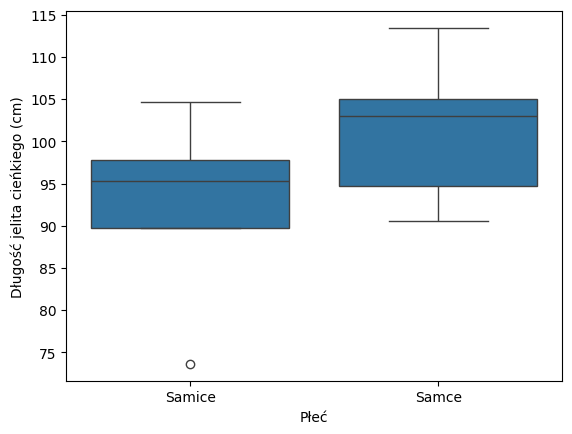

In [2]:
ds.compare_by_gender(x="Długość jelita cieńkiego (cm)")

Długość jelita grubego (cm) female: mean=6.20, std=1.16, cv=0.16
Długość jelita grubego (cm) male: mean=5.81, std=1.65, cv=0.27
t-test Długość jelita grubego (cm) by gender: pvalue=0.64
Saving plot to 'images/Długość jelita grubego (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość jelita grubego (cm)'>

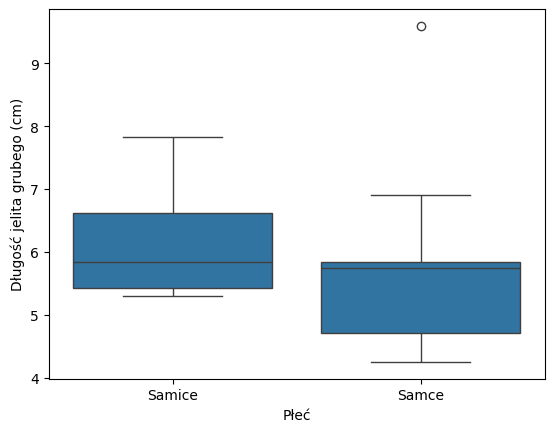

In [3]:
ds.compare_by_gender(x="Długość jelita grubego (cm)")

Całkowita długość jelit (cm) female: mean=98.45, std=13.62, cv=0.12
Całkowita długość jelit (cm) male: mean=107.02, std=7.61, cv=0.07
t-test Całkowita długość jelit (cm) by gender: pvalue=0.31
Saving plot to 'images/Całkowita długość jelit (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Całkowita długość jelit (cm)'>

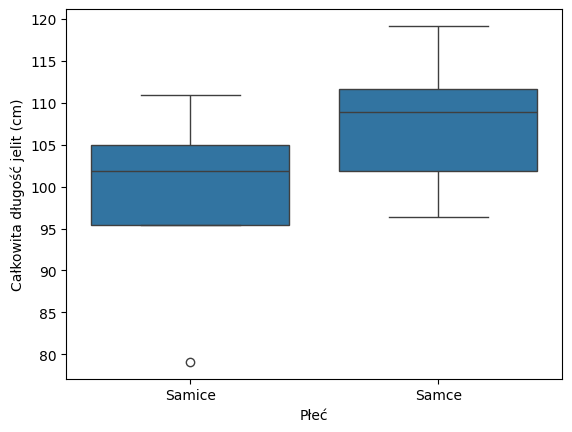

In [4]:
ds.compare_by_gender(x="Całkowita długość jelit (cm)")

<Axes: xlabel='Całkowita długość jelit (cm)', ylabel='Count'>

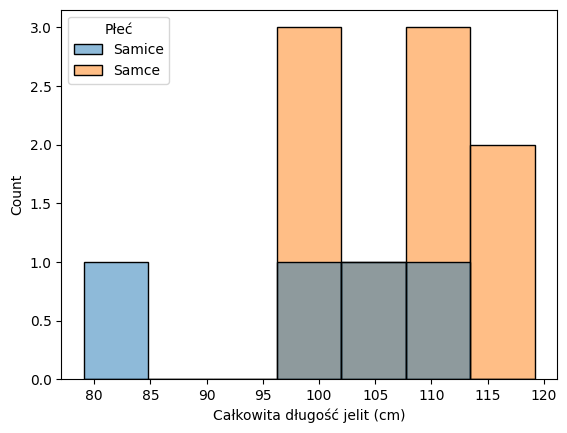

In [5]:
ds.histogram(x="Całkowita długość jelit (cm)", hue="Płeć")

Masa ciała (g): mean=294.48, std=75.49
	F
Całkowita długość jelit (cm): mean=104.38, std=10.10
	F
r^2=0.41, pvalue=0.16
    F r^2=0.73, pvalue=0.27
    M r^2=-0.10, pvalue=0.79
y = aaa  0,06x + 88,11
R² = 0,17
Saving plot to 'images/Correlation between Masa ciała (g) and Całkowita długość jelit (cm).png'


<Axes: xlabel='Masa ciała (g)', ylabel='Całkowita długość jelit (cm)'>

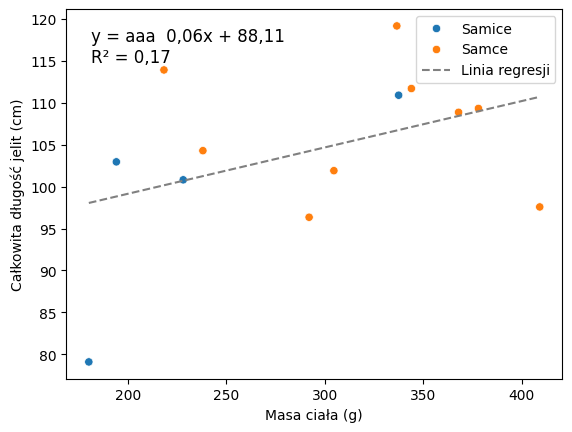

In [6]:
ds.corr_body_mass(y="Całkowita długość jelit (cm)", hue="Płeć")

Stosunek C/G female: mean=15.12, std=2.76, cv=0.16
Stosunek C/G male: mean=18.46, std=4.37, cv=0.22
t-test Stosunek C/G by gender: pvalue=0.13
Saving plot to 'images/Stosunek C_G by gender.png'


<Axes: xlabel='Płeć', ylabel='Stosunek C/G'>

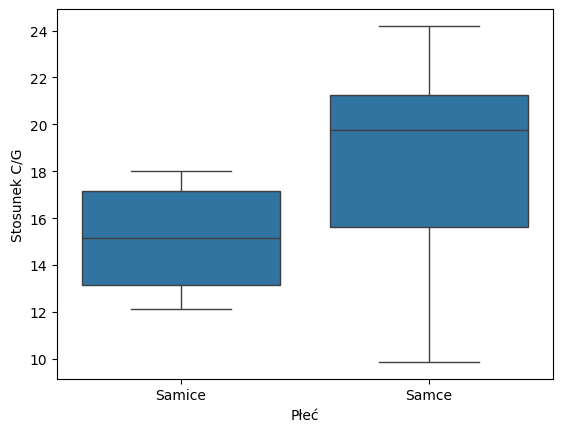

In [7]:
ds.compare_by_gender(x="Stosunek C/G")

# Old

In [8]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

df = ds.df
df["Jelito Cienkie"] = df["Długość dwunastnicy (cm)"] + df["Długość jelita czczego (cm)"] + df["Długość jelita biodrowego (cm)"]
df["Jelito Grube"] = ((df["Długość jelita ślepego P (cm)"].replace("BRAK", pd.NA) + df["Długość jelita ślepego P (cm)"]) / 2) + df["Okrężnica z odbytnicą (cm)"]

<Axes: xlabel='Jelito Cienkie', ylabel='Count'>

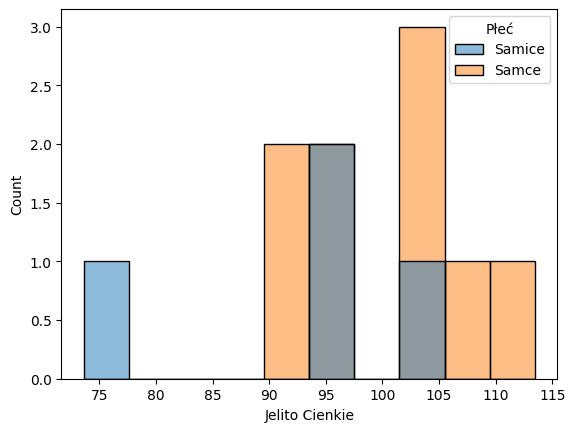

In [9]:
sns.histplot(data=df, x="Jelito Cienkie", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='Jelito Grube', ylabel='Count'>

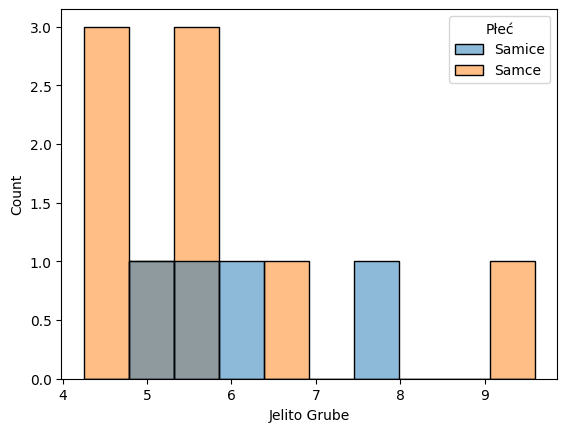

In [10]:
sns.histplot(data=df, x="Jelito Grube", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='C/G Ratio', ylabel='Count'>

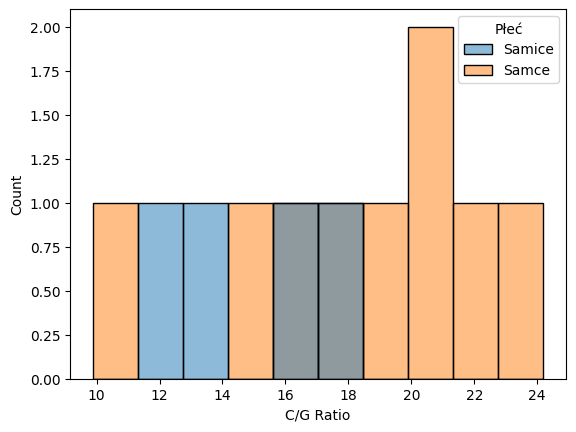

In [11]:
df["C/G Ratio"] = df["Jelito Cienkie"] / df["Jelito Grube"]
sns.histplot(data=df, x="C/G Ratio", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='Płeć', ylabel='C/G Ratio'>

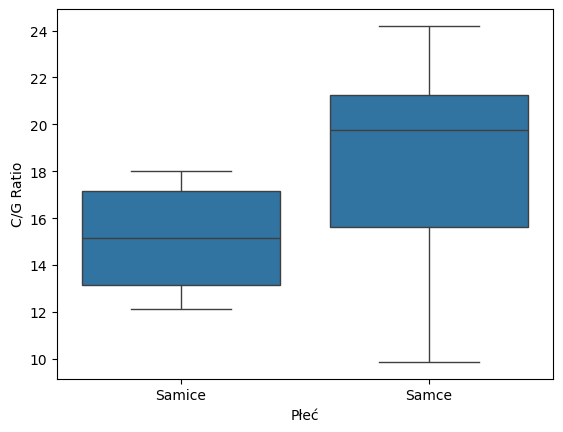

In [12]:
sns.boxplot(x="Płeć", y="C/G Ratio", data=df)

In [13]:
f = df["C/G Ratio"][df["Płeć"] == "Samice"].dropna().astype(float)
m = df["C/G Ratio"][df["Płeć"] == "Samce"].dropna().astype(float)

In [14]:
f.mean(), m.mean()

(np.float64(15.12398156978589), np.float64(18.455303735495406))

In [15]:
f.std(), m.std()

(np.float64(2.7574276568768465), np.float64(4.36545405040012))

In [16]:
stats.shapiro(f), stats.shapiro(m)

(ShapiroResult(statistic=np.float64(0.9206262510038977), pvalue=np.float64(0.5404633500143509)),
 ShapiroResult(statistic=np.float64(0.9485914675375451), pvalue=np.float64(0.6746031440729258)))

In [17]:
stats.mannwhitneyu(f, m)

MannwhitneyuResult(statistic=np.float64(9.0), pvalue=np.float64(0.1986013986013986))

<Axes: xlabel='Długość jelit (cm)', ylabel='Count'>

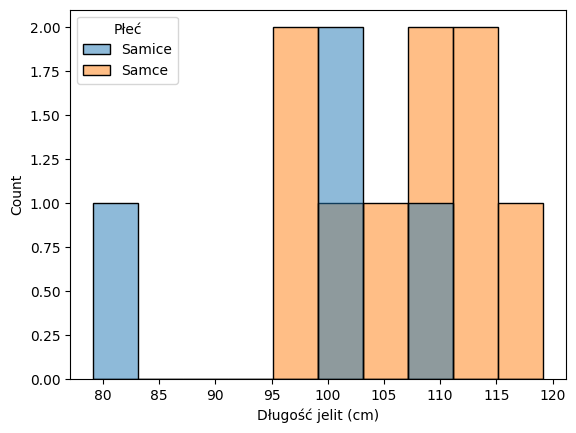

In [18]:
df["Długość jelit (cm)"] = df["Jelito Cienkie"] + df["Jelito Grube"]
df["Długość jelit (cm)"] = df["Długość jelit (cm)"].replace("BRAK", pd.NA).dropna().astype(float)
sns.histplot(data=df, x="Długość jelit (cm)", hue="Płeć", stat="count", bins=10)

<Axes: xlabel='Płeć', ylabel='Długość jelit (cm)'>

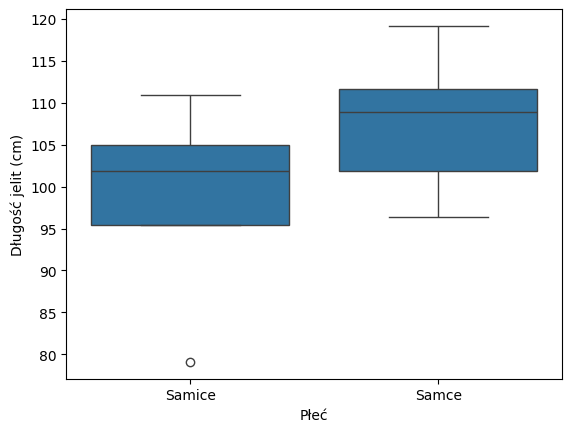

In [19]:
sns.boxplot(x="Płeć", y="Długość jelit (cm)", data=df)

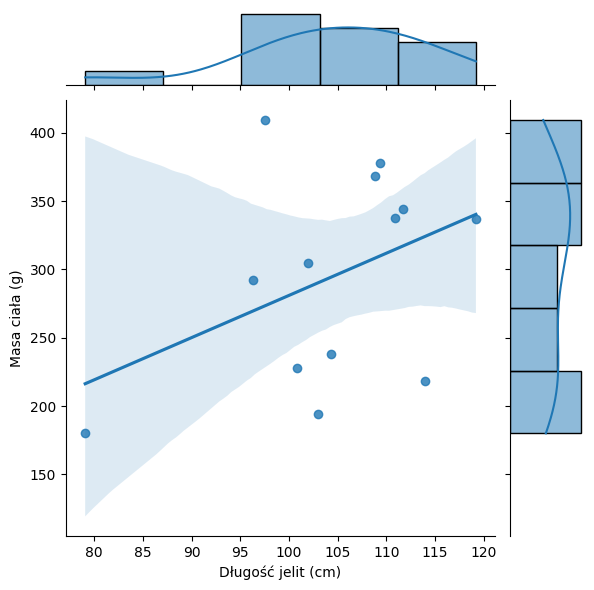

In [20]:
sns.jointplot(x="Długość jelit (cm)", y="Masa ciała (g)", data=df, kind='reg')

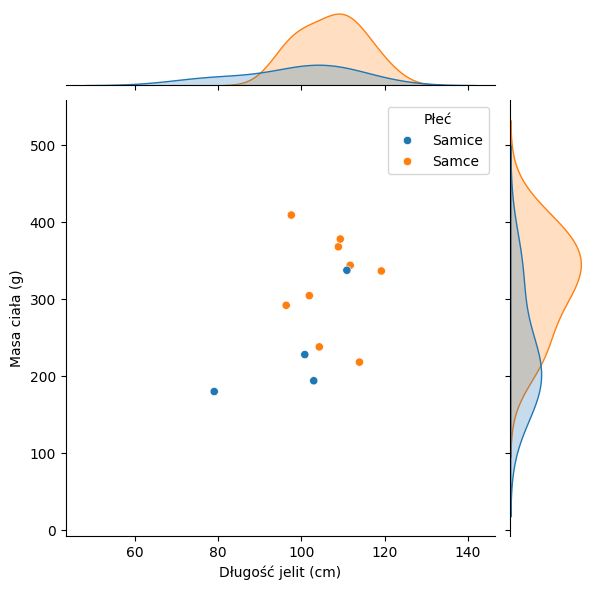

In [21]:
sns.jointplot(x="Długość jelit (cm)", y="Masa ciała (g)", data=df, hue="Płeć")